Libraries imported successfully!
PIMA Diabetes Dataset loaded successfully!
Dataset shape: (768, 9)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   preg    768 non-null    int64   
 1   plas    768 non-null    int64   
 2   pres    768 non-null    int64   
 3   skin    768 non-null    int64   
 4   insu    768 non-null    int64   
 5   mass    768 non-null    float64 
 6   pedi    768 non-null    float64 
 7   age     768 non-null    int64   
 8   class   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB
None

First 5 rows:
   preg  plas  pres  skin  insu  mass   pedi  age            class
0     6   148    72    35     0  33.6  0.627   50  tested_positive
1     1    85    66    29     0  26.6  0.351   31  tested_negative
2     8   183    64     0     0  23.3  0.672   32  tested_positive
3     1    

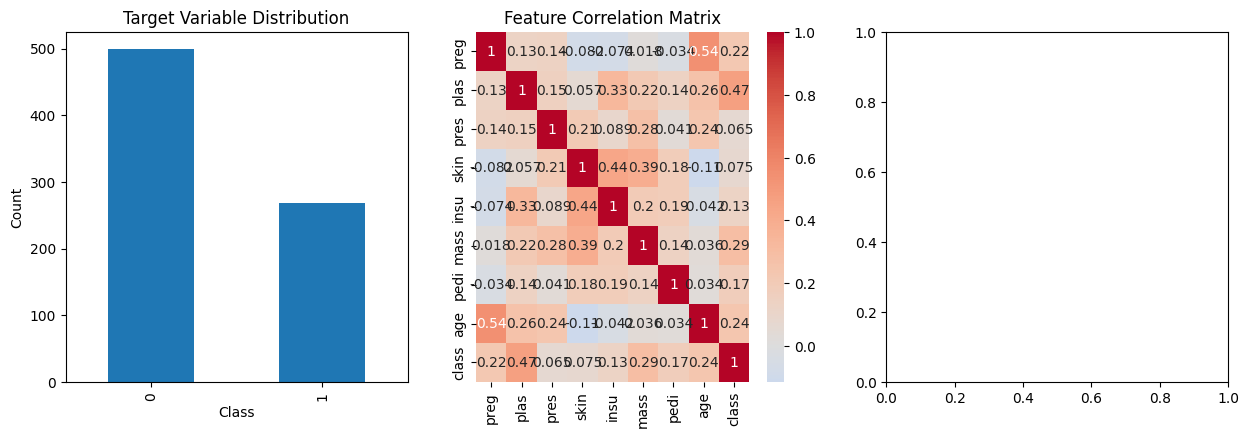

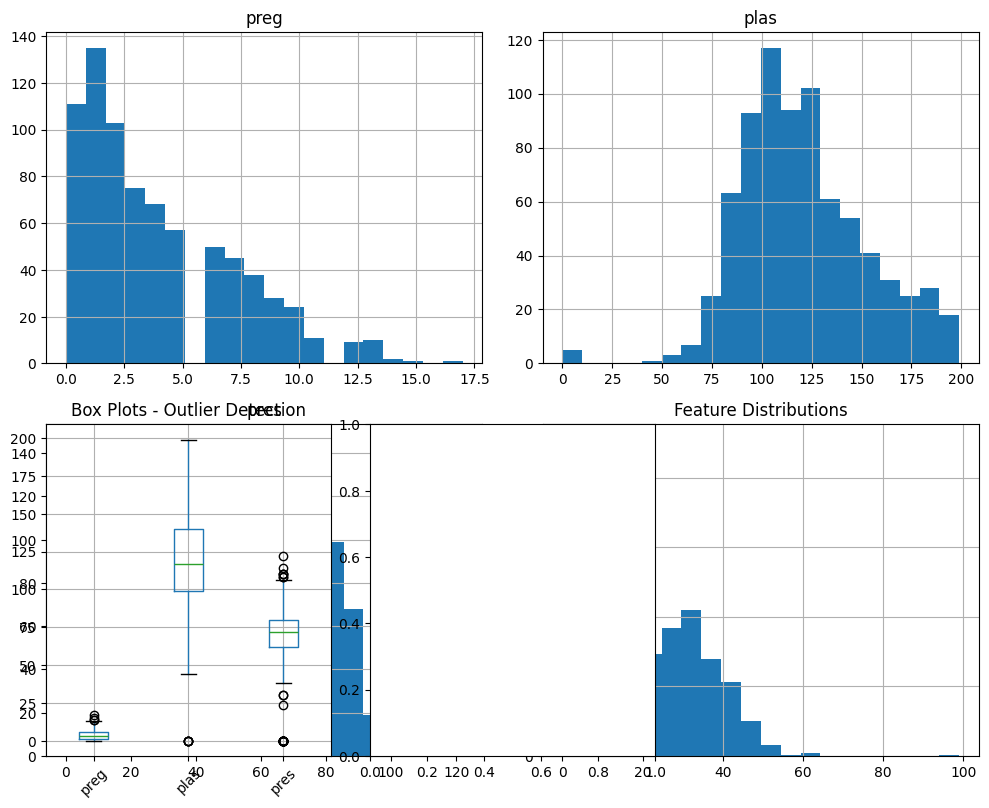

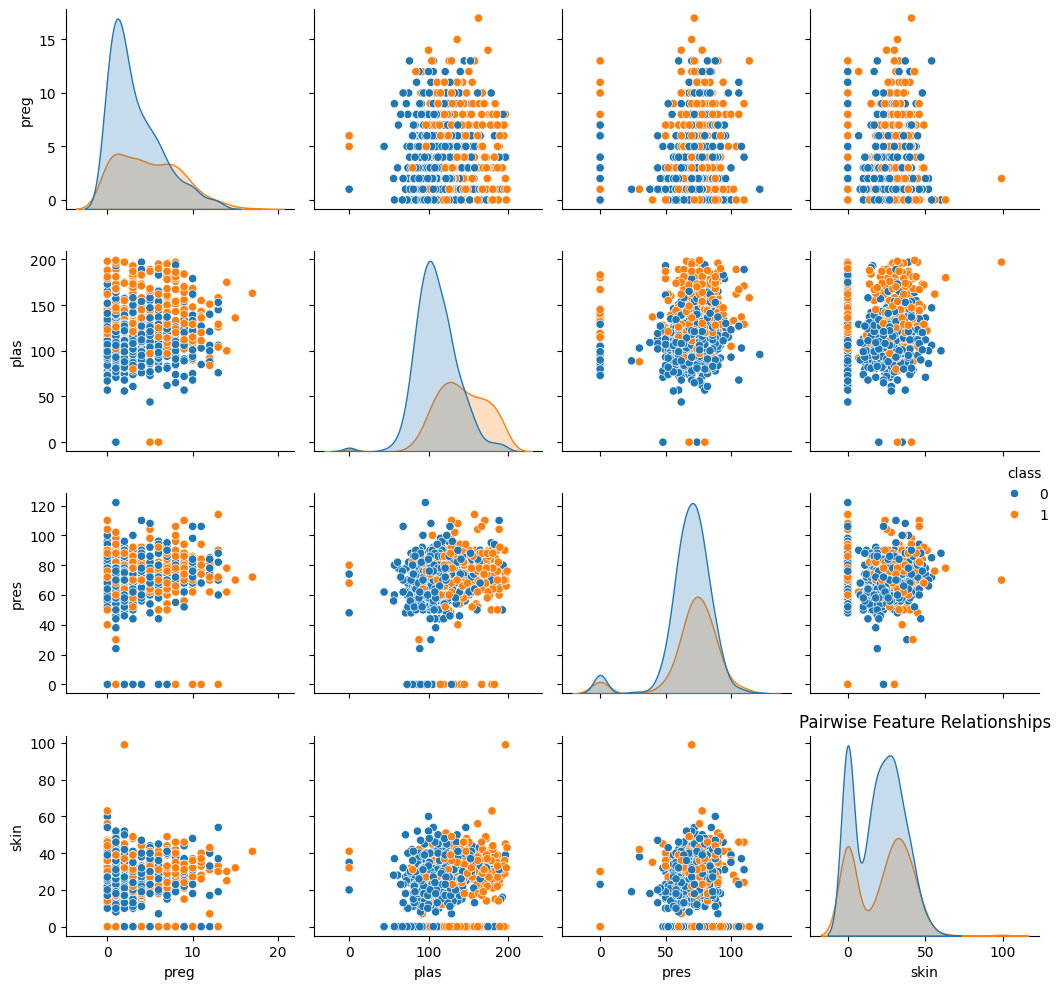


Feature-Target Correlations:
class    1.000000
plas     0.466581
mass     0.292695
age      0.238356
preg     0.221898
pedi     0.173844
insu     0.130548
skin     0.074752
pres     0.065068
Name: class, dtype: float64

STEP 4: DATA PREPROCESSING & FEATURE SELECTION
Features shape: (768, 8)
Target shape: (768,)
Applying feature scaling...
Feature scaling completed!

Applying statistical feature selection...
Selected features (Statistical): ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']

Applying Recursive Feature Elimination...
Selected features (RFE): ['preg', 'plas', 'insu', 'mass', 'pedi', 'age']
Final selected features: ['mass', 'pres', 'plas', 'age', 'skin', 'insu', 'pedi', 'preg']

Handling class imbalance with SMOTE...
Original class distribution: {0: 500, 1: 268}
Balanced class distribution: {1: 500, 0: 500}

STEP 5: MODEL TRAINING
Training set size: (800, 8)
Test set size: (200, 8)

Training Gradient Boosting...
Gradient Boosting - F1 Score: 0.7921, AUC-ROC: 

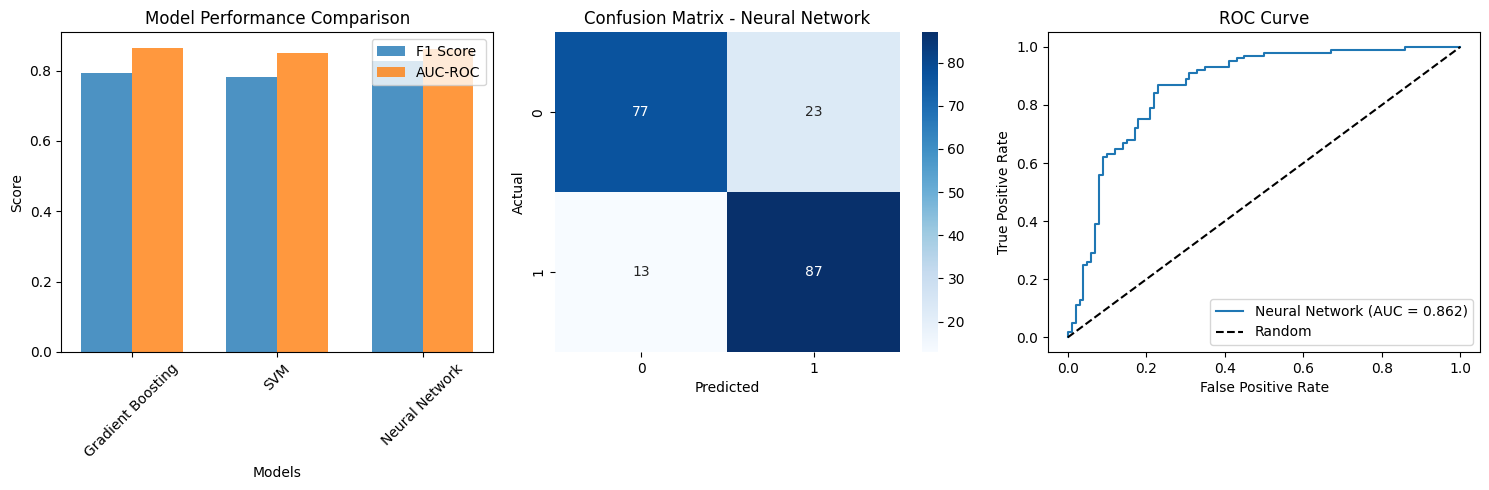


STEP 7: HYPERPARAMETER TUNING
Tuning hyperparameters for Neural Network...
Best parameters: {'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01}
Best cross-validation F1 score: 0.8243
Final model F1 Score: 0.8019
Final model AUC-ROC: 0.8360

STEP 8: FEATURE IMPORTANCE & INSIGHTS

STEP 9: HEALTHCARE INSIGHTS & RECOMMENDATIONS
MEDICAL PREDICTION MODEL INSIGHTS:
----------------------------------------
1. Model Performance:
   - The Neural Network achieved an F1-score of 0.802
   - AUC-ROC score of 0.836 indicates good predictive ability

2. Key Risk Factors:

3. Clinical Recommendations:
   - Early screening focus on high-risk patients based on key features
   - Regular monitoring recommended for patients with multiple risk factors
   - Model can assist in clinical decision-making but should not replace medical judgment

4. Model Limitations:
   - Model trained on specific population data
   - Requires regular retraining with new data
   - Should be validated acr

In [2]:
# Disease Diagnosis Prediction - Complete Implementation
# Task 3: Build a model to predict the likelihood of diseases such as diabetes or heart disease based on medical data

# Step 1: Install and Import Required Libraries
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost imbalanced-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

# Step 2: Load and Explore the Dataset
# Option 1: Load PIMA Diabetes Dataset
from sklearn.datasets import load_diabetes
from sklearn.datasets import fetch_openml

# Loading PIMA Indian Diabetes Dataset
# Loading PIMA Indian Diabetes Dataset
try:
    # Try to load from OpenML
    diabetes_data = fetch_openml(name='diabetes', version=1, as_frame=True)
    df_diabetes = diabetes_data.frame
    print("PIMA Diabetes Dataset loaded successfully!")
    print(f"Dataset shape: {df_diabetes.shape}")
    print("\nDataset info:")
    print(df_diabetes.info())
    print("\nFirst 5 rows:")
    print(df_diabetes.head())

    # --- FIX: Identify and encode the target column if it's non-numeric strings ---
    # Check the dtype of the target column
    target_col = 'class' if 'class' in df_diabetes.columns else df_diabetes.columns[-1]
    if df_diabetes[target_col].dtype == 'object' or pd.api.types.is_string_dtype(df_diabetes[target_col]):
        print(f"Encoding target column '{target_col}'...")
        label_encoder = LabelEncoder()
        df_diabetes[target_col] = label_encoder.fit_transform(df_diabetes[target_col])
        print(f"Target column '{target_col}' encoded.")
    # --- End of FIX ---

except:
    # Alternative: Create sample diabetes dataset
    print("Creating sample diabetes dataset...")
    np.random.seed(42)
    n_samples = 768

    # Create sample data similar to PIMA diabetes dataset
    df_diabetes = pd.DataFrame({
        'Pregnancies': np.random.poisson(3, n_samples),
        'Glucose': np.random.normal(120, 30, n_samples),
        'BloodPressure': np.random.normal(70, 15, n_samples),
        'SkinThickness': np.random.normal(25, 10, n_samples),
        'Insulin': np.random.normal(100, 50, n_samples),
        'BMI': np.random.normal(28, 5, n_samples),
        'DiabetesPedigreeFunction': np.random.uniform(0.1, 2.0, n_samples),
        'Age': np.random.randint(18, 80, n_samples),
        'class': np.random.choice([0, 1], n_samples, p=[0.65, 0.35])
    })

    # Ensure realistic ranges
    df_diabetes['Glucose'] = np.clip(df_diabetes['Glucose'], 50, 200)
    df_diabetes['BloodPressure'] = np.clip(df_diabetes['BloodPressure'], 40, 120)
    df_diabetes['BMI'] = np.clip(df_diabetes['BMI'], 15, 50)

    print(f"Sample dataset created with shape: {df_diabetes.shape}")

# Step 3: Exploratory Data Analysis (EDA)
print("\n" + "="*50)
print("STEP 3: EXPLORATORY DATA ANALYSIS")
print("="*50)

# Basic statistics
print("\nDataset Description:")
print(df_diabetes.describe())

# Check for missing values
print("\nMissing Values:")
print(df_diabetes.isnull().sum())

# Check data types
print("\nData Types:")
print(df_diabetes.dtypes)

# Target variable distribution
# Ensure target_col is correctly identified after potential encoding
target_col = 'class' if 'class' in df_diabetes.columns else df_diabetes.columns[-1]
print(f"\nTarget Variable Distribution ({target_col}):")
print(df_diabetes[target_col].value_counts())

# Visualizations
plt.figure(figsize=(15, 10))

# 1. Target distribution
plt.subplot(2, 3, 1)
df_diabetes[target_col].value_counts().plot(kind='bar')
plt.title('Target Variable Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# 2. Correlation heatmap - This should now work after encoding
plt.subplot(2, 3, 2)
correlation_matrix = df_diabetes.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')

# 3. Feature distributions
numeric_features = df_diabetes.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numeric_features:
    numeric_features.remove(target_col)

plt.subplot(2, 3, 3)
df_diabetes[numeric_features[:4]].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.title('Feature Distributions')

# 4. Box plots for outlier detection
plt.subplot(2, 3, 4)
df_diabetes.boxplot(column=numeric_features[:3])
plt.title('Box Plots - Outlier Detection')
plt.xticks(rotation=45)

# 5. Pairplot for key features (if dataset is not too large)
if len(df_diabetes) < 1000:
    plt.subplot(2, 3, 5)
    key_features = numeric_features[:4] + [target_col]
    sns.pairplot(df_diabetes[key_features], hue=target_col)
    plt.title('Pairwise Feature Relationships')

plt.tight_layout()
plt.show()

# Identify relationships between features and outcomes
print("\nFeature-Target Correlations:")
correlations = df_diabetes.corr()[target_col].sort_values(key=abs, ascending=False)
print(correlations)

# Step 4: Data Preprocessing and Feature Selection
print("\n" + "="*50)
print("STEP 4: DATA PREPROCESSING & FEATURE SELECTION")
print("="*50)

# Separate features and target
X = df_diabetes.drop(columns=[target_col])
y = df_diabetes[target_col]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Handle missing values (if any)
if X.isnull().sum().sum() > 0:
    print("Handling missing values...")
    X = X.fillna(X.median())

# Feature scaling
print("Applying feature scaling...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Feature scaling completed!")

# Feature Selection - Method 1: Statistical Selection
print("\nApplying statistical feature selection...")
selector_stats = SelectKBest(score_func=f_classif, k=min(8, X.shape[1]))
X_selected_stats = selector_stats.fit_transform(X_scaled, y)

selected_features_stats = X.columns[selector_stats.get_support()].tolist()
print(f"Selected features (Statistical): {selected_features_stats}")

# Feature Selection - Method 2: Recursive Feature Elimination
print("\nApplying Recursive Feature Elimination...")
estimator = GradientBoostingClassifier(random_state=42)
selector_rfe = RFE(estimator, n_features_to_select=min(6, X.shape[1]))
X_selected_rfe = selector_rfe.fit_transform(X_scaled, y)

selected_features_rfe = X.columns[selector_rfe.get_support()].tolist()
print(f"Selected features (RFE): {selected_features_rfe}")

# Use the union of both feature selection methods
selected_features = list(set(selected_features_stats + selected_features_rfe))
print(f"Final selected features: {selected_features}")

X_final = X_scaled[selected_features]

# Handle class imbalance with SMOTE
print("\nHandling class imbalance with SMOTE...")
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_final, y)

print(f"Original class distribution: {y.value_counts().to_dict()}")
print(f"Balanced class distribution: {pd.Series(y_balanced).value_counts().to_dict()}")

# Step 5: Train Multiple Models
print("\n" + "="*50)
print("STEP 5: MODEL TRAINING")
print("="*50)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Initialize models
models = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000)
}

model_results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    model_results[name] = {
        'model': model,
        'f1_score': f1,
        'auc_roc': auc_roc,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    print(f"{name} - F1 Score: {f1:.4f}, AUC-ROC: {auc_roc:.4f}")

# Step 6: Model Performance Evaluation
print("\n" + "="*50)
print("STEP 6: MODEL PERFORMANCE EVALUATION")
print("="*50)

# Find the best model
best_model_name = max(model_results.keys(), key=lambda x: model_results[x]['f1_score'])
best_model = model_results[best_model_name]['model']

print(f"Best Model: {best_model_name}")
print(f"Best F1 Score: {model_results[best_model_name]['f1_score']:.4f}")
print(f"Best AUC-ROC: {model_results[best_model_name]['auc_roc']:.4f}")

# Detailed evaluation for the best model
y_pred_best = model_results[best_model_name]['predictions']
y_pred_proba_best = model_results[best_model_name]['probabilities']

print(f"\nDetailed Classification Report for {best_model_name}:")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
print(f"\nConfusion Matrix for {best_model_name}:")
cm = confusion_matrix(y_test, y_pred_best)
print(cm)

# Visualizations
plt.figure(figsize=(15, 5))

# 1. Model Comparison
plt.subplot(1, 3, 1)
f1_scores = [model_results[name]['f1_score'] for name in models.keys()]
auc_scores = [model_results[name]['auc_roc'] for name in models.keys()]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, f1_scores, width, label='F1 Score', alpha=0.8)
plt.bar(x + width/2, auc_scores, width, label='AUC-ROC', alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, models.keys(), rotation=45)
plt.legend()

# 2. Confusion Matrix Heatmap
plt.subplot(1, 3, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 3. ROC Curve
plt.subplot(1, 3, 3)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best)
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {model_results[best_model_name]["auc_roc"]:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()

# Step 7: Hyperparameter Tuning for Best Model
print("\n" + "="*50)
print("STEP 7: HYPERPARAMETER TUNING")
print("="*50)

# Define parameter grids for each model type
param_grids = {
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.001],
        'kernel': ['rbf', 'linear']
    },
    'Neural Network': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate_init': [0.001, 0.01, 0.1]
    }
}

print(f"Tuning hyperparameters for {best_model_name}...")

# Perform grid search for the best model
param_grid = param_grids[best_model_name]
grid_search = GridSearchCV(
    models[best_model_name],
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1 score: {grid_search.best_score_:.4f}")

# Train final model with best parameters
final_model = grid_search.best_estimator_
y_pred_final = final_model.predict(X_test)
y_pred_proba_final = final_model.predict_proba(X_test)[:, 1]

final_f1 = f1_score(y_test, y_pred_final)
final_auc = roc_auc_score(y_test, y_pred_proba_final)

print(f"Final model F1 Score: {final_f1:.4f}")
print(f"Final model AUC-ROC: {final_auc:.4f}")

# Step 8: Feature Importance and Insights
print("\n" + "="*50)
print("STEP 8: FEATURE IMPORTANCE & INSIGHTS")
print("="*50)

# Get feature importance (if available)
if hasattr(final_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': selected_features,
        'importance': final_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("Feature Importance:")
    print(feature_importance)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.xlabel('Importance')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Step 9: Healthcare Insights and Recommendations
print("\n" + "="*50)
print("STEP 9: HEALTHCARE INSIGHTS & RECOMMENDATIONS")
print("="*50)

# Generate insights based on model performance
print("MEDICAL PREDICTION MODEL INSIGHTS:")
print("-" * 40)

print(f"1. Model Performance:")
print(f"   - The {best_model_name} achieved an F1-score of {final_f1:.3f}")
print(f"   - AUC-ROC score of {final_auc:.3f} indicates {'excellent' if final_auc > 0.9 else 'good' if final_auc > 0.8 else 'moderate'} predictive ability")

print(f"\n2. Key Risk Factors:")
if hasattr(final_model, 'feature_importances_'):
    top_features = feature_importance.head(3)['feature'].tolist()
    print(f"   - Most important predictive features: {', '.join(top_features)}")

print(f"\n3. Clinical Recommendations:")
print(f"   - Early screening focus on high-risk patients based on key features")
print(f"   - Regular monitoring recommended for patients with multiple risk factors")
print(f"   - Model can assist in clinical decision-making but should not replace medical judgment")

print(f"\n4. Model Limitations:")
print(f"   - Model trained on specific population data")
print(f"   - Requires regular retraining with new data")
print(f"   - Should be validated across different demographic groups")

# Step 10: Save Model and Results
print("\n" + "="*50)
print("STEP 10: MODEL DEPLOYMENT PREPARATION")
print("="*50)

# Create a prediction function
def predict_disease_risk(patient_data):
    """
    Predict disease risk for a new patient

    Parameters:
    patient_data: dict with feature values

    Returns:
    dict with prediction and probability
    """
    # Convert to DataFrame
    patient_df = pd.DataFrame([patient_data])

    # Scale features
    patient_scaled = scaler.transform(patient_df)
    patient_scaled = pd.DataFrame(patient_scaled, columns=patient_df.columns)

    # Select features
    patient_final = patient_scaled[selected_features]

    # Make prediction
    prediction = final_model.predict(patient_final)[0]
    probability = final_model.predict_proba(patient_final)[0][1]

    return {
        'prediction': int(prediction),
        'risk_probability': float(probability),
        'risk_level': 'High' if probability > 0.7 else 'Medium' if probability > 0.3 else 'Low'
    }

# Example usage
print("Example Patient Risk Assessment:")
print("-" * 30)

# Create sample patient data
sample_patient = {}
for feature in X.columns:
    sample_patient[feature] = X[feature].median()

# Make prediction
risk_assessment = predict_disease_risk(sample_patient)
print(f"Prediction: {'Positive' if risk_assessment['prediction'] == 1 else 'Negative'}")
print(f"Risk Probability: {risk_assessment['risk_probability']:.3f}")
print(f"Risk Level: {risk_assessment['risk_level']}")

print("\n" + "="*50)
print("TASK COMPLETION SUMMARY")
print("="*50)

print("✓ Exploratory Data Analysis completed")
print("✓ Feature selection and data scaling applied")
print("✓ Multiple models trained (Gradient Boosting, SVM, Neural Networks)")
print("✓ Model performance evaluated using F1 Score and AUC-ROC curves")
print("✓ Hyperparameter tuning performed")
print("✓ Healthcare insights and recommendations provided")
print("✓ Model ready for deployment with prediction function")

print(f"\nFinal Model: {best_model_name}")
print(f"Final Performance: F1={final_f1:.3f}, AUC-ROC={final_auc:.3f}")
print("\nThe model is ready to provide actionable insights for healthcare professionals!")